<a href="https://colab.research.google.com/github/Aniruthsiri/CV1/blob/main/Text_Analytics_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0) เตรียมสภาพแวดล้อม

# ติดตั้งและ import ไลบรารีที่จำเป็น
!pip install wordcloud==1.9.3 matplotlib pandas --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
from google.colab import files
uploaded = files.upload()  # เลือก Coffe_sales.csv


Saving Coffe_sales.csv to Coffe_sales.csv


In [ ]:
#1) โหลดและสำรวจข้อมูล

df = pd.read_csv("Coffe_sales.csv", encoding="utf-8")
df.head()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


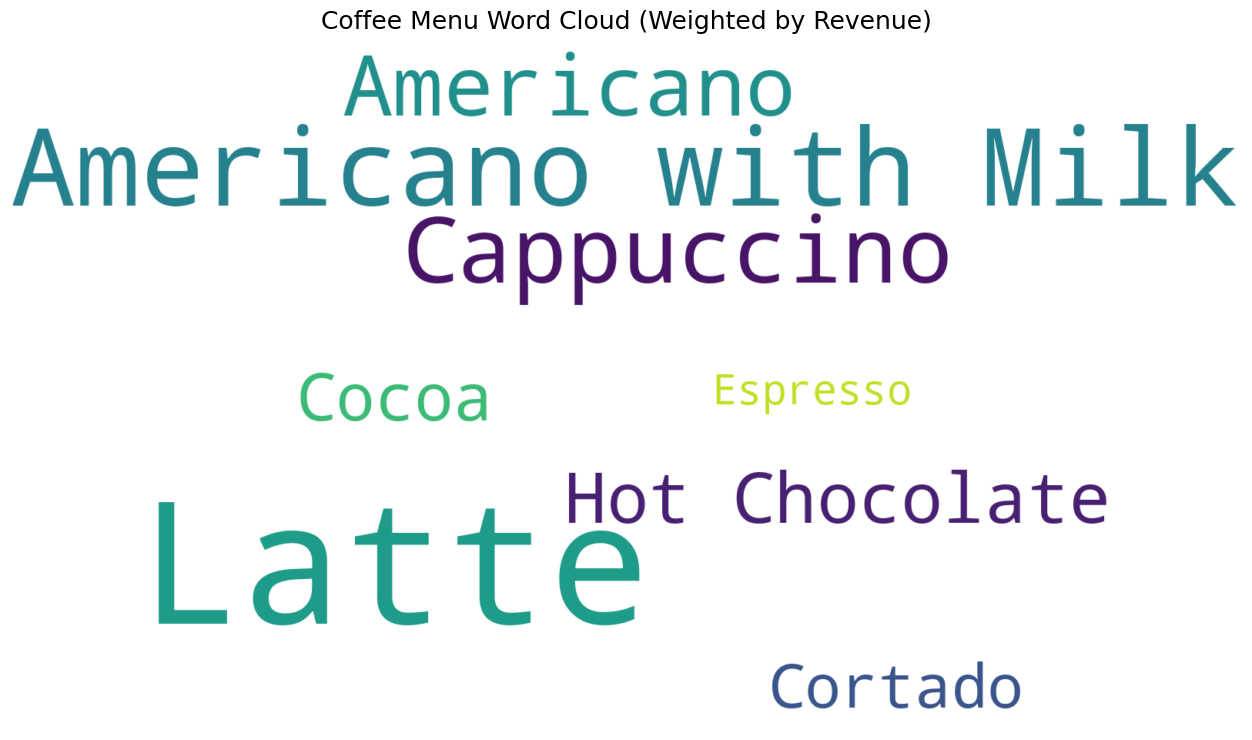

In [ ]:
#2) Word Cloud: เมนูถ่วงน้ำหนักด้วย “ยอดขายรวม”

# รวมยอดขายต่อเมนู
rev_by_menu = (df.groupby("coffee_name")["money"]
                 .sum()
                 .sort_values(ascending=False))

# แปลงเป็น dict สำหรับ WordCloud
freq_dict = rev_by_menu.to_dict()

# สร้าง Word Cloud
wc = WordCloud(
    width=1600, height=900,
    background_color="white",
    prefer_horizontal=0.95,
    collocations=False  # ไม่รวมคำซ้ำแบบ bigram อัตโนมัติ
).generate_from_frequencies(freq_dict)

# แสดงผล
plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Coffee Menu Word Cloud (Weighted by Revenue)", fontsize=18)
plt.show()

# บันทึกไฟล์
wc.to_file("wordcloud_revenue_by_menu.png")


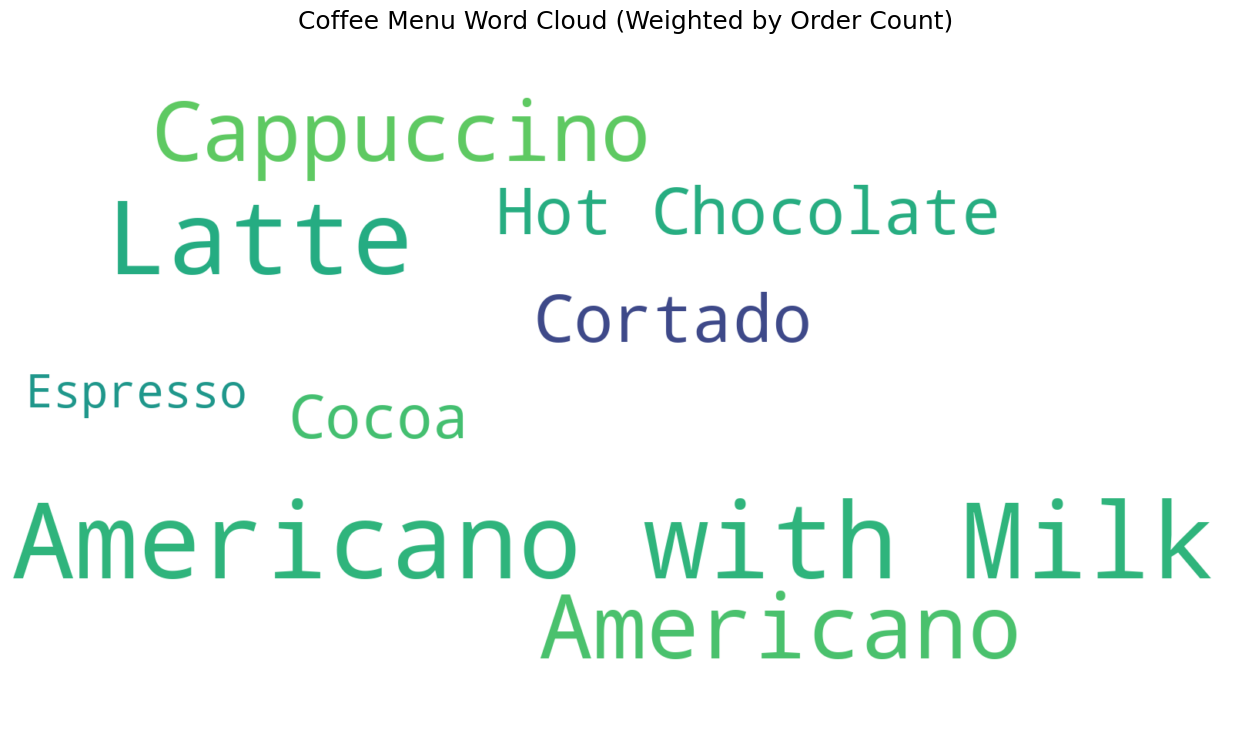

In [ ]:
#3) (ทางเลือก) Word Cloud: เมนูถ่วงน้ำหนักด้วย “จำนวนบิล/ความถี่”

# นับความถี่ต่อเมนู
count_by_menu = df["coffee_name"].value_counts()

wc2 = WordCloud(
    width=1600, height=900,
    background_color="white",
    prefer_horizontal=0.95,
    collocations=False
).generate_from_frequencies(count_by_menu.to_dict())

plt.figure(figsize=(16,9))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.title("Coffee Menu Word Cloud (Weighted by Order Count)", fontsize=18)
plt.show()

wc2.to_file("wordcloud_count_by_menu.png")


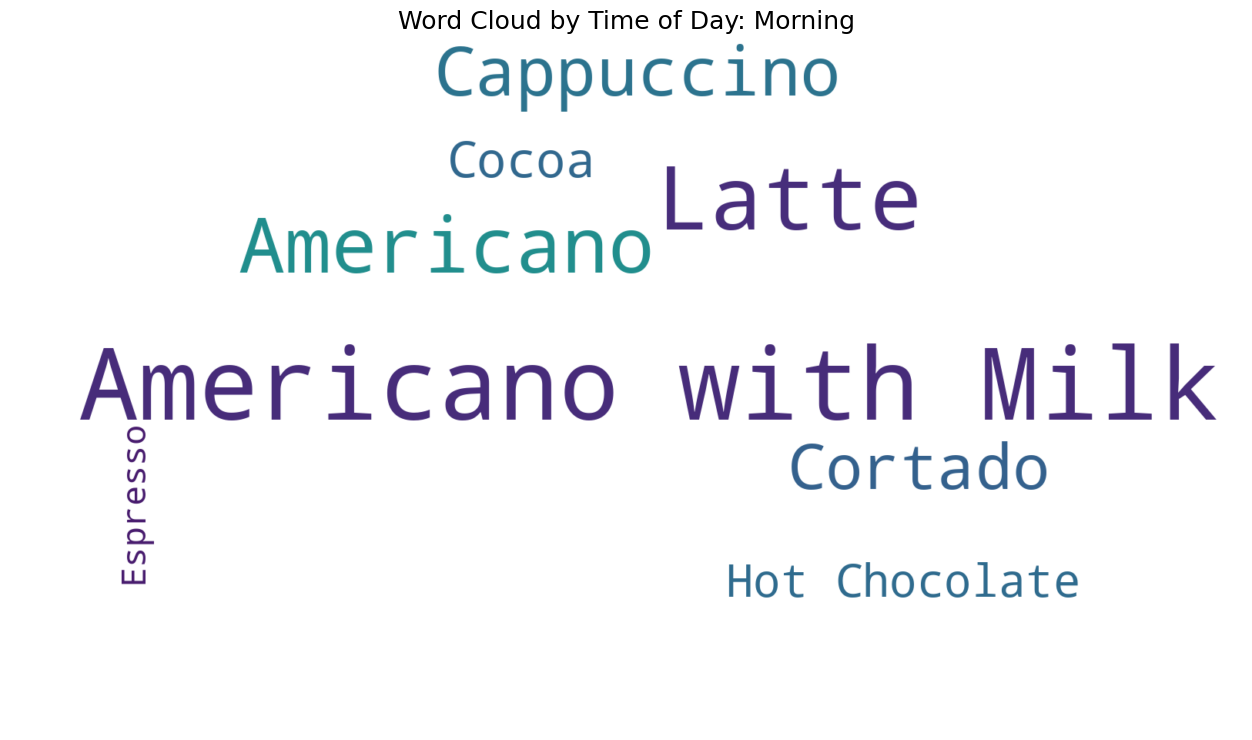

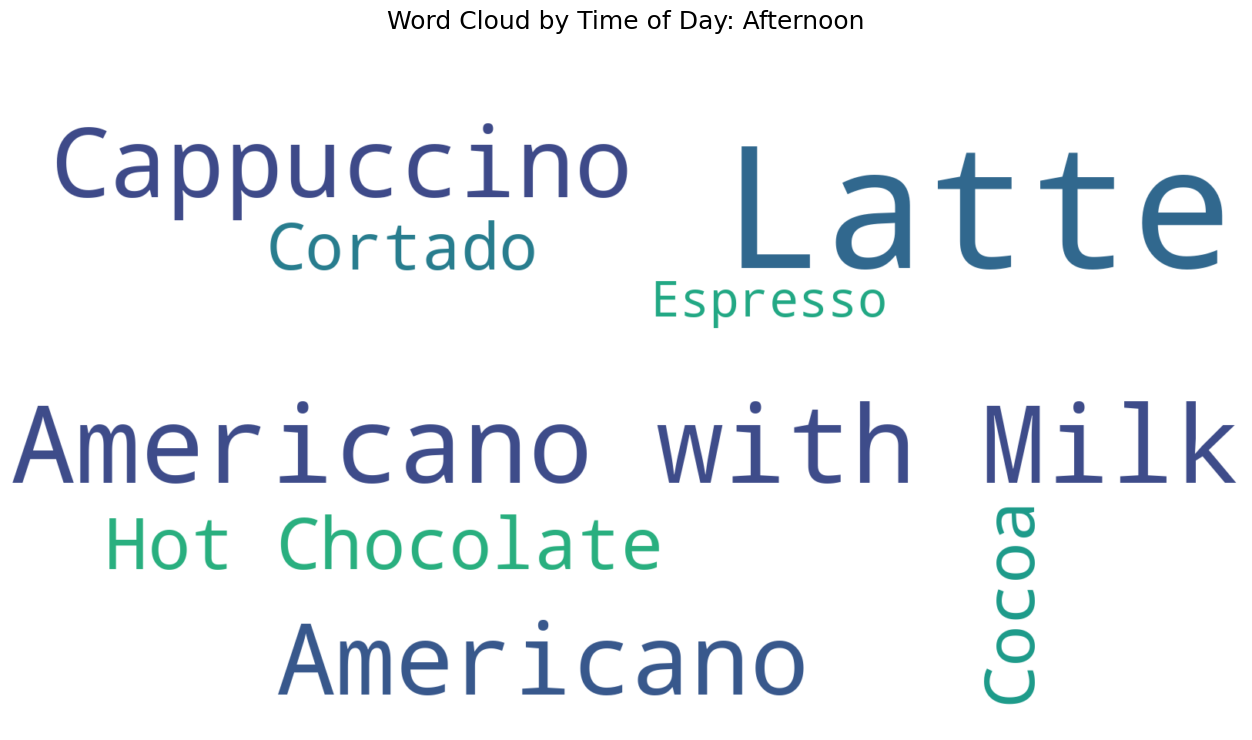

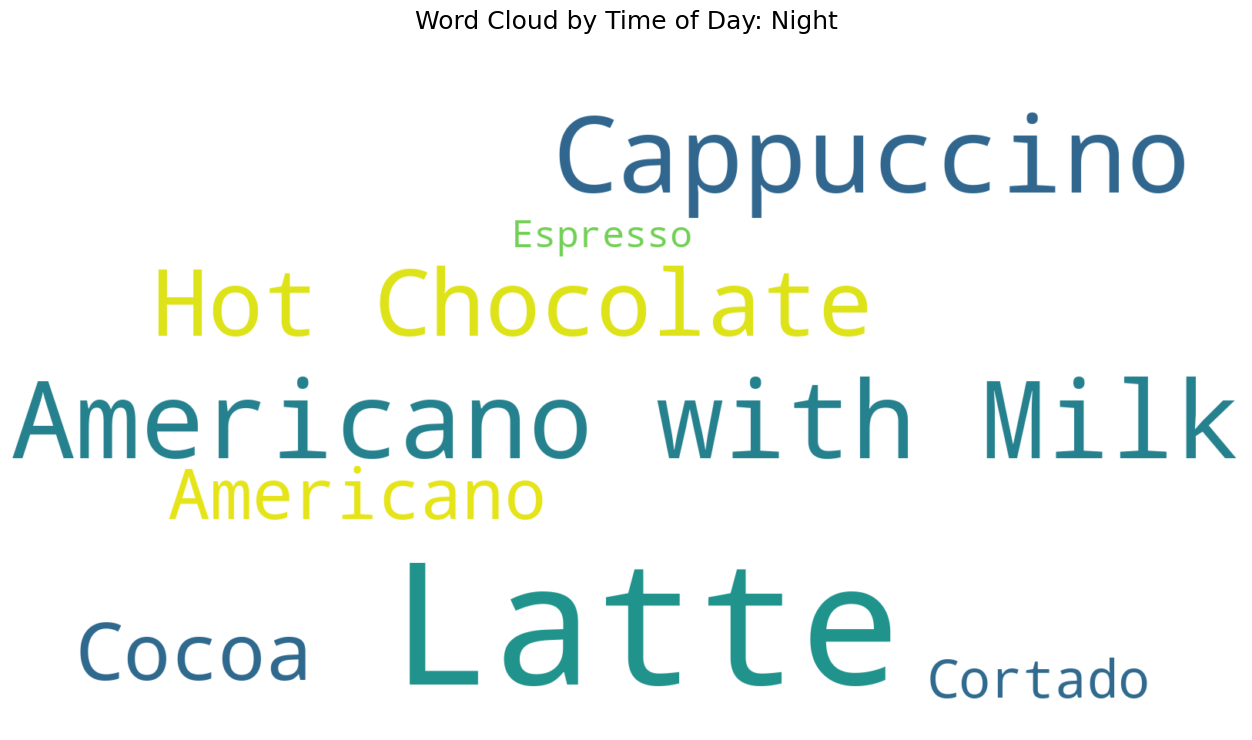

In [7]:
#4) (ทางเลือก) ทำ Word Cloud “รายช่วงเวลา” (Morning / Afternoon / Night)

for tod in df["Time_of_Day"].dropna().unique():
    sub = df[df["Time_of_Day"] == tod]
    if sub.empty:
        continue
    f = sub.groupby("coffee_name")["money"].sum().to_dict()
    if not f:
        continue
    wc_tod = WordCloud(width=1600, height=900, background_color="white",
                       collocations=False).generate_from_frequencies(f)
    plt.figure(figsize=(16,9))
    plt.imshow(wc_tod, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud by Time of Day: {tod}", fontsize=18)
    plt.show()
    wc_tod.to_file(f"wordcloud_{tod.lower()}.png")


In [10]:
#5) เคล็ดลับคุณภาพภาพ

rev_by_menu = rev_by_menu[rev_by_menu > 500]  # เก็บเฉพาะเมนูรายได้ > 500 บาท

